In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# стандартизация
from sklearn.preprocessing import StandardScaler

# метрики
from sklearn.metrics import (accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay)

import warnings
warnings.filterwarnings('ignore')

/home/w_lander/anaconda3/envs/dowgrade/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df_cancer = pd.read_csv('data/Cancer_Data.csv', index_col='id')
df_cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


1. Определение скорости обучения
Используйте Cancer_Data для классификации. 
* Обучите модель логистической регрессии с разными значениями скорости обучения (с разными значениями параметра C, который является обратным значением скорости обучения).
* Запишите и сравните результаты метрик качества и скорости сходимости модели.


In [3]:
df_cancer.isna().sum()

diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 32                569
dtype: i

In [4]:
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 842302 to 92751
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                 

In [5]:
df_cancer = df_cancer.drop('Unnamed: 32', axis=1)

In [6]:
df_cancer['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [7]:
df_cancer['diagnosis'] = df_cancer['diagnosis'].replace({'B': 0, 'M': 1})
df_cancer['diagnosis'].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

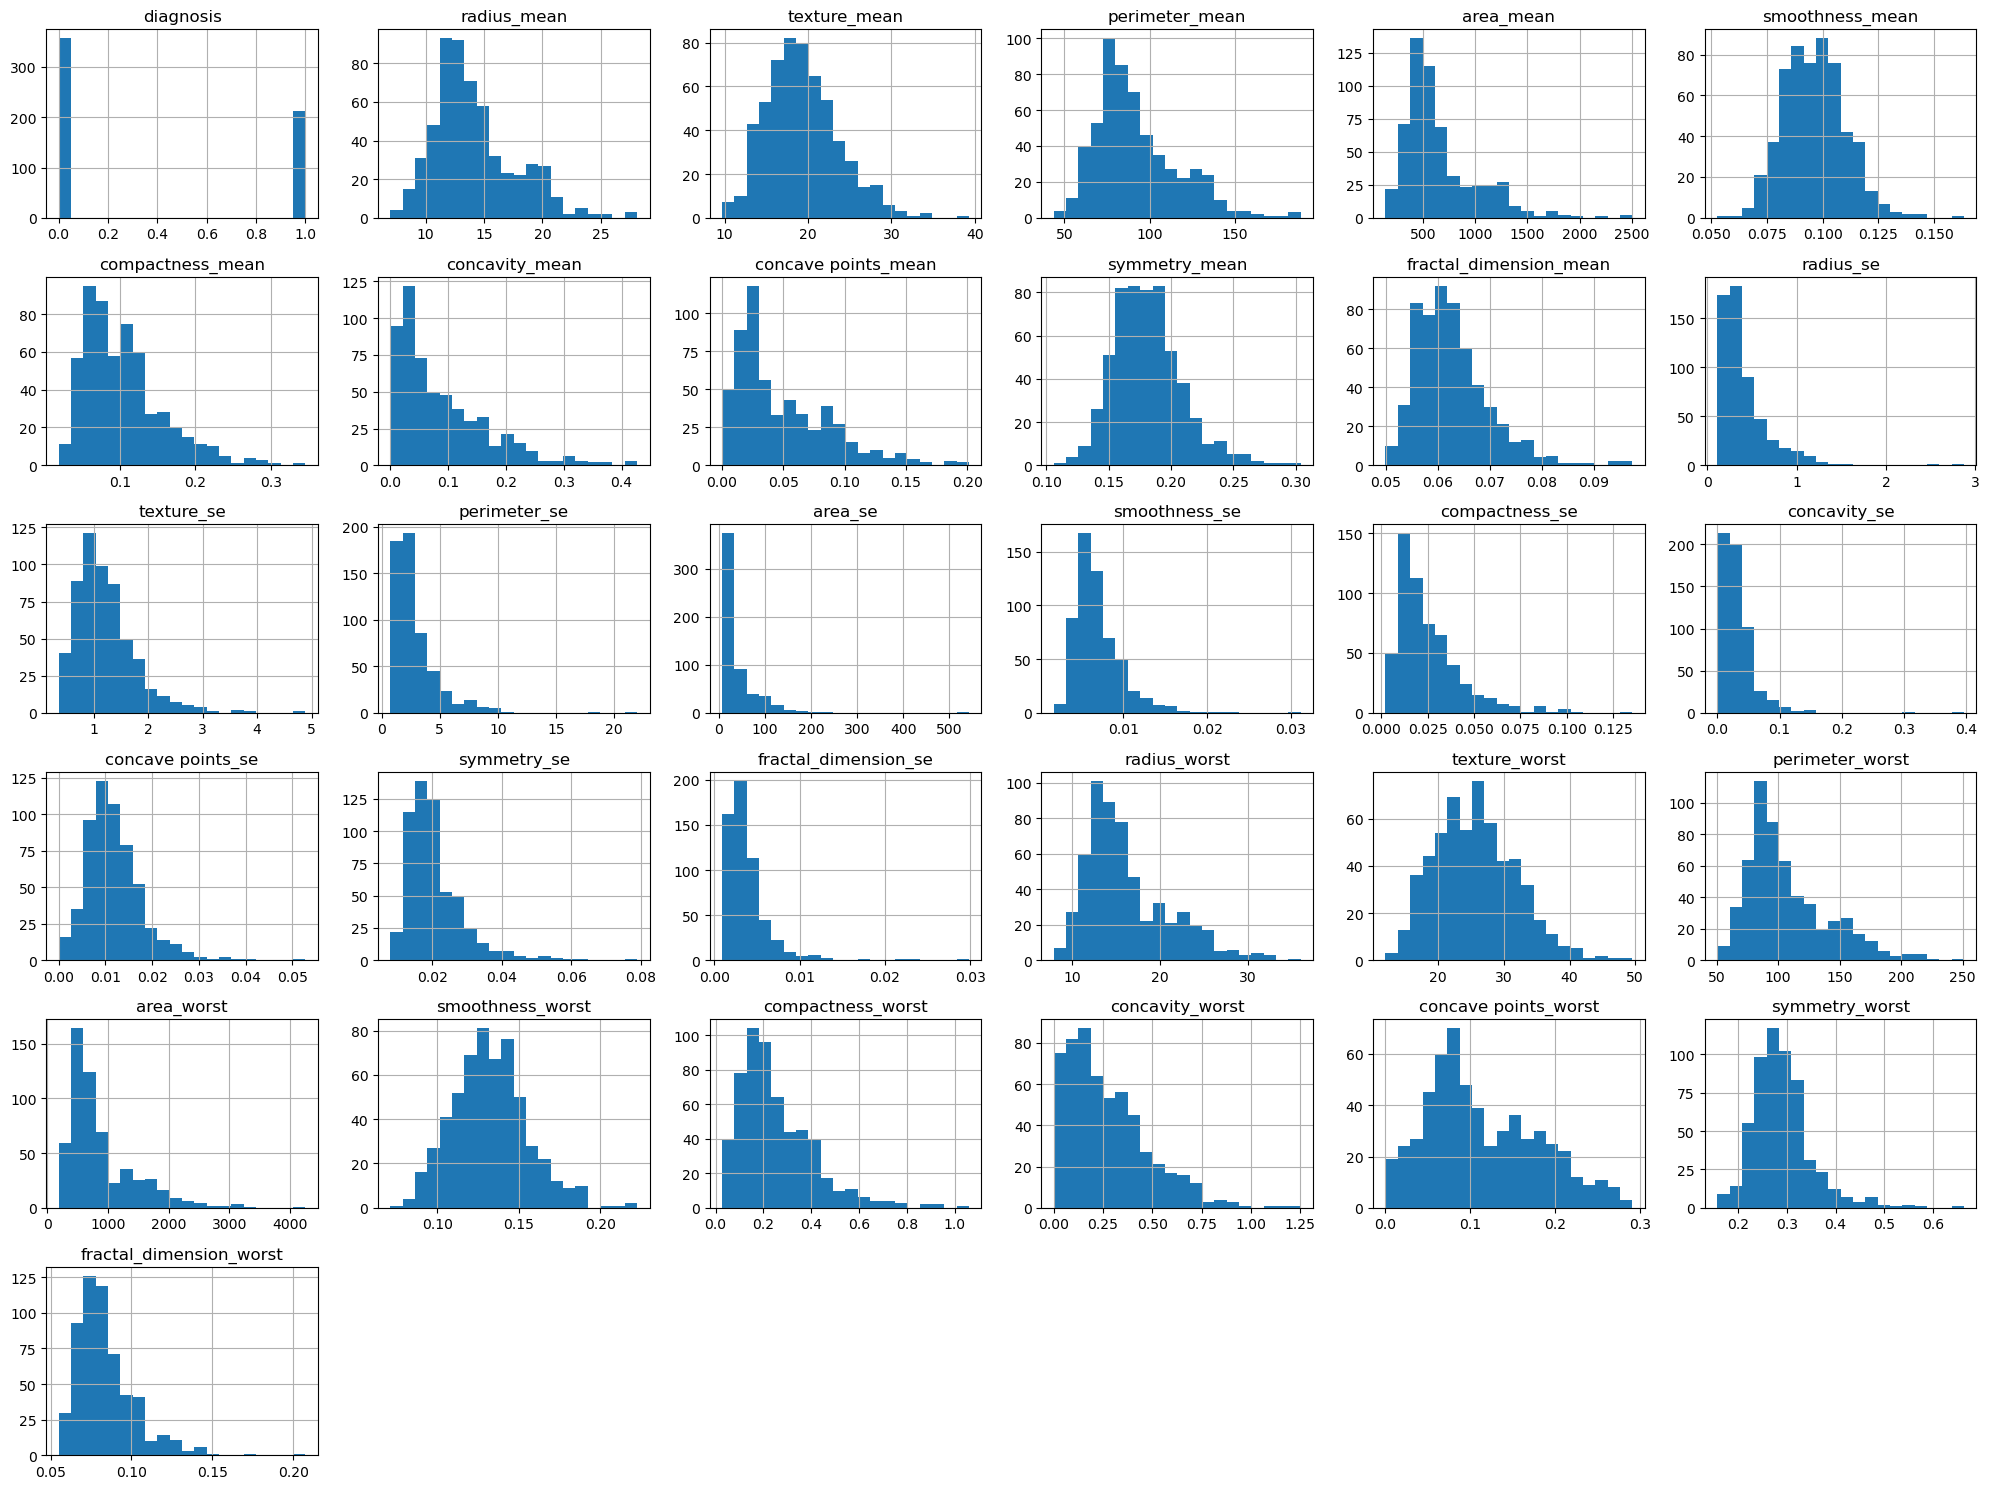

In [8]:
# Генерирует гистограммы для всех числовых столбцов в DataFrame
df_cancer.hist(figsize=(20, 15), bins=20)
plt.tight_layout() # Улучшает размещение подграфиков чтобы они не пересекались
plt.grid(alpha=0.3)
plt.show()

### Построим матрицу корреляции для выявления линейной зависимоти

In [9]:
# подготовим признаки
df_corr = df_cancer

In [10]:
corr_matrix = df_corr.corr()
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.1] = 0

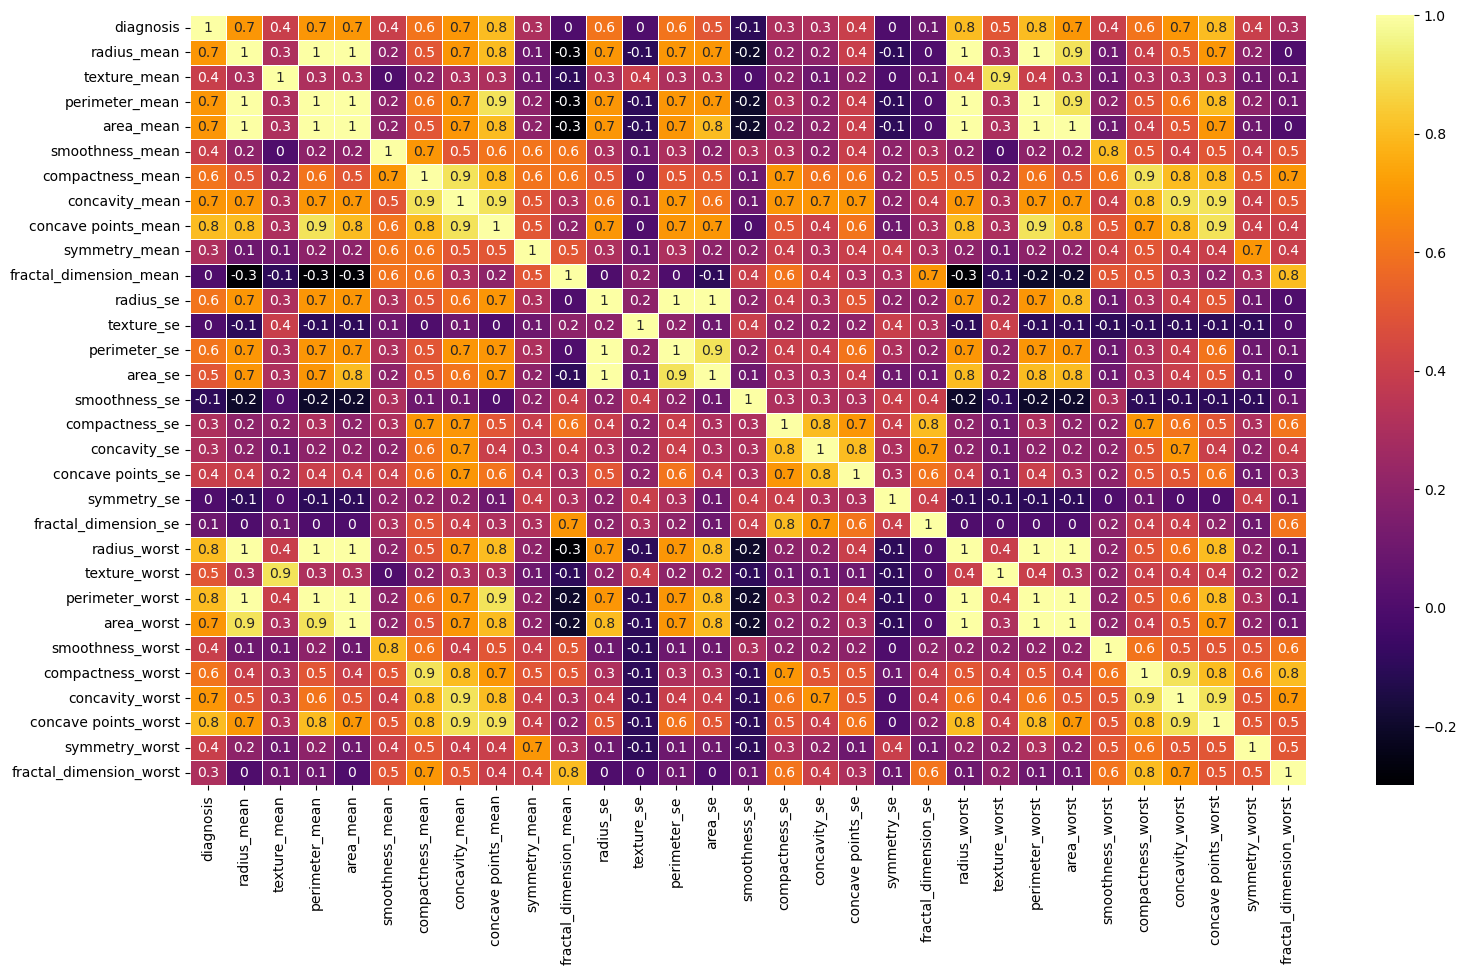

In [11]:
plt.figure(figsize=(18, 10))

sns.heatmap(corr_matrix, annot=True, linewidths=0.7, cmap='inferno')
plt.xticks(rotation=90)
#plt.yticks(rotation=35)
plt.show()

### Стандартизируем наши данные и раздели на обучающую и тестовую выборки

In [12]:
#X = df_cancer[['symmetry_mean', 'compactness_se']]
X = df_cancer.drop('diagnosis', axis=1)
Y = df_cancer['diagnosis']
X_scaled = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state = 42)

In [13]:
df_cancer.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [14]:
X_train.shape, X_test.shape

((341, 30), (228, 30))

### Построение модели

In [15]:
%%time
model = LogisticRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
print('TEST')
print(classification_report(y_test, predictions))

TEST
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       148
           1       0.97      0.94      0.96        80

    accuracy                           0.97       228
   macro avg       0.97      0.96      0.97       228
weighted avg       0.97      0.97      0.97       228

CPU times: user 51.3 ms, sys: 1.04 ms, total: 52.3 ms
Wall time: 50.7 ms


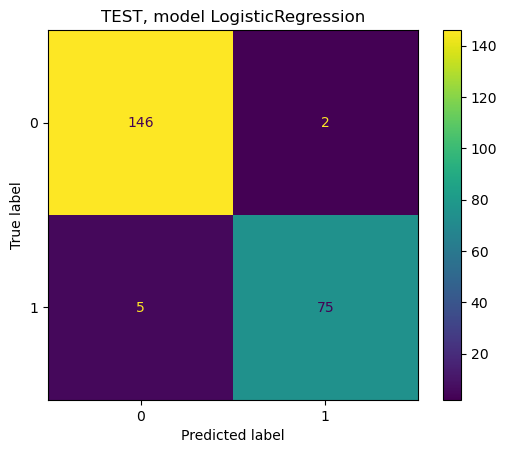

In [16]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, predictions))
disp.plot()
plt.title('TEST, model LogisticRegression')
plt.show()

### Познакомиться с работой стохастического градиентного спуска.
* Используйте набор данных для обучения модели с использованием стохастического градиентного спуска (SGD - модель SGDClassifier библиотека sklearn https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html).
* Сравните скорость сходимости и итоговое качество модели со стандартным градиентным спуском (используйте логистическую регрессию).

In [17]:
from sklearn.linear_model import SGDClassifier

In [18]:
learning_rates = [0.001, 0.01, 0.1, 0.5, 1.0]
results = []

# eta0 - начальная скорость обучения 
# Когда learning_rate='constant': eta0 остается постоянным в течение всего процесса обучения.
# tol = 1e-4 Обучение прекращается, если изменения функции потерь меньше 0.0001
for lr in learning_rates:
    model = SGDClassifier(eta0=lr,  learning_rate='constant', max_iter=1000, tol=1e-4, random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    
    results.append({
        'Learning Rate': lr,
        'Accuracy': accuracy,
        'Number of Iterations': model.n_iter_
    })
results_df = pd.DataFrame(results)
results_df

,Learning Rate,Accuracy,Number of Iterations
0,0.001,0.964912,20
1,0.010,0.960526,17
2,0.100,0.697368,22
3,0.500,0.894737,17
4,1.000,0.907895,17


### Сравнить разные алгоритмы оптимизации.

* Обучитe модель логистической регрессии на этих данных, используя разные оптимизаторы, и сравните их эффективность. Используйте параметр solver, который может принимать значения:
* 'liblinear': использует координатный спуск (Coordinate Descent, CD). Хорошо подходит для небольших датасетов.
* 'lbfgs': аппроксимация метода Бройдена – Флетчера – Гольдфарба – Шанно (BFGS). Рекомендуется для небольших и средних датасетов.
* 'newton-cg': Ньютоновский метод сопряженных градиентов. Требует много ресурсов для больших датасетов из-за необходимости вычисления матрицы Гессе.
* 'sag': Стохастический градиентный спуск с использованием среднего градиента. Подходит для больших датасетов.
* 'saga': Расширение 'sag', поддерживает L1-регуляризацию, такое сочетание регуляризаций делает его вариацией метода Elastic Net.


In [19]:
import time

In [20]:
methods = ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga']
results = pd.DataFrame(columns=['Method','Score', 'Time'])

In [21]:
for method in methods:
    start_time = time.time()
    
    model = LogisticRegression(solver=method)
    model.fit(X_train, y_train)
    
    predictions = model.predict(X_test)
    
    score = accuracy_score(y_test, predictions)
    total_time = time.time() - start_time
    
    results.loc[len(results)] = [method, round(score, 3), total_time]

In [22]:
results

,Method,Score,Time
0,liblinear,0.965,0.012567
1,lbfgs,0.969,0.043813
2,newton-cg,0.969,0.136476
3,sag,0.956,0.026180
4,saga,0.952,0.040368
